# Simulations Lab

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt

## Practice

### Optional exercises to review basic python

+ If you want to build a collection of things, keeping track of their order, but do not know how many things you will have, should you use a `dict`, `list`, or `array`?  

A `list`.  You can append to a list (unlike an array) and it has a guaranteed order (unlike a dict).

+ If you want do do fast math operations on many numbers at once, should you use a `tuple`, `array` or `list`?

An `array`.  Arrays do math in C, and are thus much faster than tuples or lists.

+ Use an appropriate data type that allows you to look up the common name of an organism give its scientific name. 


| scientific | common |
|------------|--------|
| X. laevis  | frog   |
| M. musculus| mouse  |
| H. sapiens | human  |

In [2]:
my_dict = {"X. laevis":"frog","M. musculus":"mouse","H. sapiens":"human"}

+ Use a `for` loop to print out every 3rd value between -97 and 33.

In [3]:
for i in range(-97,33,3):
    print(i)

-97
-94
-91
-88
-85
-82
-79
-76
-73
-70
-67
-64
-61
-58
-55
-52
-49
-46
-43
-40
-37
-34
-31
-28
-25
-22
-19
-16
-13
-10
-7
-4
-1
2
5
8
11
14
17
20
23
26
29
32


+ You have an instrument that is going to spit out 1000 decimal numbers.  The following loop simulates this using the `time.time()` function, which spits out the time in seconds since January 1, 1970 at 12:00 GMT.  **Capture the output using a numpy array (no lists allowed) and determine the mean.**

In [4]:
import time


my_array = np.zeros(1000)
for i in range(1000):
    instrument_spew = time.time()
    my_array[i] = instrument_spew



### Optional exercises to review plotting

Reference material is [here](https://github.com/harmsm/pythonic-science/blob/master/reference/plotting_reference.ipynb).

+ On the same graph, plot: $y = x$, $y = x^2$, $y = x^{3}$ ... $y = x^{10}$ for $x \in [-10,10]$.


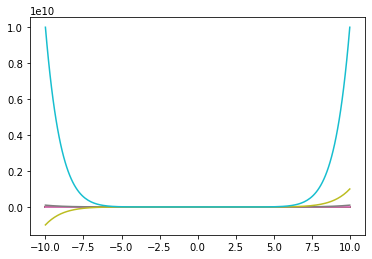

In [5]:
x = np.arange(-10,10.1,0.1)
for i in range(1,11):
    plt.plot(x,x**(i))

+ Plot $y = e^{x}$ for $x \in [-5,5]$.  Make two different graphs (in the same cell!), one using a linear $y$ scale, one using a log $y$ scale.  (Hint: use `plt.show()`). 


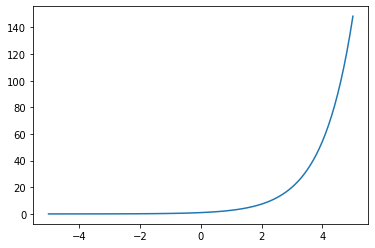

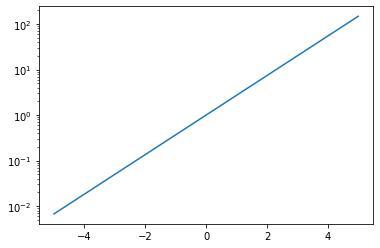

In [6]:
x = np.arange(-5,5.1,0.1)
plt.plot(x,np.exp(x))
plt.show()
plt.plot(x,np.exp(x))
plt.yscale("log")
plt.show()

+ Plot a histogram of 1000 random numbers sampled from a Poisson distribution with $\lambda = 3$.

(array([ 55., 143., 238., 223., 155.,  94.,  64.,  19.,   7.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

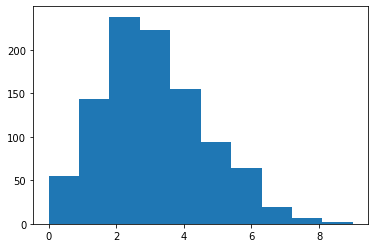

In [7]:
plt.hist(np.random.poisson(3,1000))

# Lab

## Coins in a row

You place 100 coins heads up in a row and number them by position, with the coin all the way on the left No. 1 and the one on the rightmost edge No. 100. Next, for every number N, from 1 to 100, you flip over every coin whose position is a multiple of N. For example, first you’ll flip over all the coins, because every number is a multiple of 1. Then you’ll flip over all the even-numbered coins, because they’re multiples of 2. Then you’ll flip coins No. 3, 6, 9, 12 … And so on.

What do the coins look like when you’re done? Specifically, which coins are heads down?

Source: [fivethirtyeight](https://fivethirtyeight.com/features/can-you-survive-this-deadly-board-game/)

In [8]:
# 0 -> heads
# 1 -> tails

# Initial array of heads (zeros)
coins = np.zeros(100)

# Go over all N from 1 to 100
for N in range(1,101):
    
    # Go through each coin
    for i in range(100):
        
        # The positions are labeled 1-100; our indexes go from 0-99
        position = i + 1
        
        # If this is a multiple of N, the remainder ("modulus operator") will be zero
        if position % N == 0:
            
            # Flip the coin
            if coins[i] == 0:
                coins[i] = 1
            else:
                coins[i] = 0
                
print(coins)
    

[1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1.]


## Mutant Screen

You are doing a classic blue/white lacZ mutant screen, where bacterial mutants of interest have white colonies rather than blue colonies.  You screen a library containing 10,000 mutants.  You expect that 1/1,000 mutants will be white.  Assuming no bias in the library, how many colonies do you need to look at to have a < 2% chance of missing a mutant? (You can report your sampling to within a factor of ten.)

In [9]:

def sampler():

    i = 0
    muts_seen = np.zeros(10)
    while True:
        if np.random.random() < 0.001:
            muts_seen[np.random.choice(range(10))] = True
            if np.sum(muts_seen) == 10:
                return i
        i += 1

x = []  
for i in range(1000):
    x.append(sampler())
x.sort()
print(x[980])



58874


## Dubious Paper

You read a paper that makes a big deal out of the following result.  

<div style="margin:auto">
    <img src="https://raw.githubusercontent.com/harmsm/pythonic-science/master/labs/01_simulation/paper-result.png" />
</div>

The authors claim that the difference between treatment 1 and 2 is significant and important.  You are skeptical and want to test the claim.  Fortunately, these scientists published their response data for each treatment condition in the supplement.  These are copied below. 

In [10]:
treat_1 =   [57.26977195, 46.18382224, 49.53778012, 41.48839620, 60.208242,
             50.52545917, 46.35328597, 45.74836944, 48.44702572, 52.524908,
             55.10329891, 46.61524479, 52.13253421, 54.72779465, 42.324008,
             50.33964928, 52.18085508, 53.24086389, 43.14439906, 45.148827]

treat_2 =   [60.41763564, 48.83220035, 51.12384165, 42.96237314, 62.606467,
             51.96334172, 50.68015860, 48.75041835, 51.08492900, 55.163020,
             58.30618134, 51.06279668, 54.75658646, 57.74810245, 46.318017,
             51.32863816, 54.85243237, 55.94919523, 46.42182621, 48.367620]

+ What is the difference between the means of these samples?

In [11]:
np.mean(treat_2) - np.mean(treat_1)

2.772562283499994

+ You then apply a t-test to these samples, assuming each measurement is independent.  What is the p-value?  Do you believe the researchers' conclusions? 

In [12]:
scipy.stats.ttest_ind(treat_1,treat_2)

Ttest_indResult(statistic=-1.7363083505490204, pvalue=0.09061170502478925)

+ Before you write the authors, you decide to carefully reread their methods.  You discover that the values in treat_1 and treat_2 are **paired** rather than independent.  (This means that you can compare the first sample in treat_1 to the first sample in treat_2, the second sample etc.).  What is the p-value for paired t-test?  Does this alter your conclusion above?

In [15]:
scipy.stats.ttest_rel(np.array(treat_1),np.array(treat_2))

Ttest_relResult(statistic=-13.55753242312437, pvalue=3.213475500986654e-11)

## Growing bacteria 

You are studying the growth of bacteria from a small inoculum to saturation in a flask.  The following information  will help you answer the questions below.

Given your growth conditions, the number of bacteria at time $t$ will grow according to:

$$N(t) = \frac{N_{c}}{1 + exp(\lambda - kt)}$$

where $N_{c}$, $\lambda$, and $k$ are constants. $N_{c}$ is the maximum number of bacteria that can be supported  by the environment, $\lambda$ captures how long it takes for the bacteria to start dividing post inoculation, and $k$ is the instantaneous growth rate. (We're ignoring the fact that bacteria eventually start to die after they run out of food).  For your wildtype bacteria, these constants are: $N_{c} = 1 \times 10^{10}\ cells \cdot mL^{-1}$, $\lambda = 12$ and $k = 0.05\  min^{-1}$.

  

You can measure bacterial growth by following the turbidity of your cultures using a spectrophotometer.  By careful calibration, you know that the observed $OD_{600}$ is related to the number of cells by:
$$OD_{600} = \frac{gN}{N + K}$$

where $g = 3.5$ and $K = 2 \times 10^{9}\ cells \cdot mL^{-1}$.


### Questions

+ Write two functions, one describing bacterial growth, the other describing the spectrophotometer.  (Hint: use numpy arrays, not lists!).  

In [16]:
def growth(t,a=1e10,b=12,c=0.05):
    
    return a/(1 + np.exp(b - c*t))

def OD600(c,g=3.5,K=2e9):
    
    return g*c/(K + c)

+ Create three separate graphs: 
  + $N(t)$ vs. $t$.
  + $OD_{600}$ vs. $N$
  + $OD_{600}$ vs. $t$

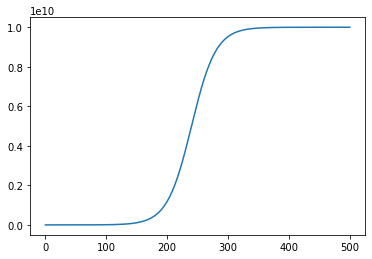

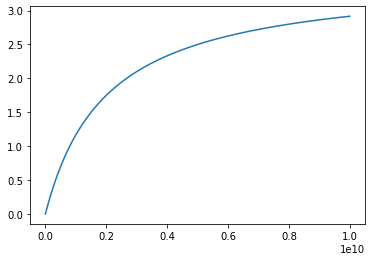

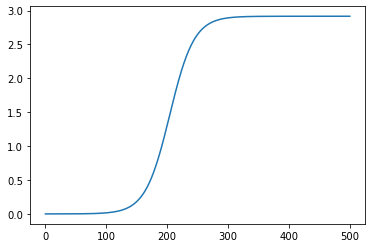

In [17]:
t = np.linspace(0,500,500)
c = np.linspace(0,1e10,500)

plt.plot(t,growth(t))
plt.show()

plt.plot(c,OD600(c))
plt.show()

plt.plot(t,OD600(growth(t)))
plt.show()


+ You introduce a mutation that you expect may increase the carrying capacity by a factor of 5. Would you rather measure this effect at 150 or 300 minutes?

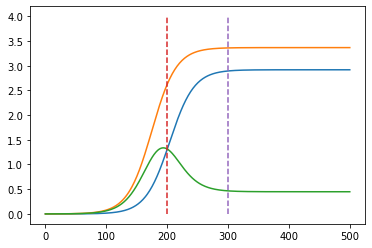

In [18]:
plt.plot(t,OD600(growth(t,a=1e10)))
plt.plot(t,OD600(growth(t,a=5e10)))

plt.plot(t,OD600(growth(t,a=5e10))-OD600(growth(t,a=1e10)))

plt.plot((200,200),(0,4),"--")
plt.plot((300,300),(0,4),"--")

+ You send your research assistant out to measure five biological replicates of the wildtype and mutant.  Unfortunately, they do not record the exact starting time of each biological replicate.  For each replicate, they guess the start time is 0 +/- 25 min. (Normal distribution with a standard deviation of 25).  Can you still measure a difference between the wildtype and mutant at 200 minutes?  What about 300 minutes?

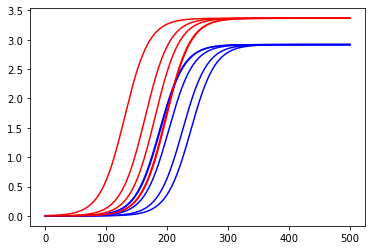

In [19]:
for i in range(5):
    t1 = t + np.random.normal(0,25,1)
    t2 = t + np.random.normal(0,25,1)
    
    plt.plot(t,OD600(growth(t1,a=1e10)),"b-")
    plt.plot(t,OD600(growth(t2,a=5e10)),"r-")




## PCR

You have a tube containing 10 molecules of DNA drawn from a population containing four different species $A$, $B$, $C$, and $D$.  You want to want to estimate the frequencies of $A$, $B$, $C$, and $D$ in the original popuation.  If you were omniscient, you would know that $A$, $B$, $C$, and $D$ have the following actual frequencies:

| species | frequency |
|:-------:|:---------:|
| A       |  0.5      |
| B       |  0.2      |
| C       |  0.2      |
| D       |  0.1      |

Since you aren't omniscient, you make a measurement. You use a Polymerase Chain Reaction (PCR) to amplify those 10 molecules, then use high-throughput sequencing to measure the relative frequencies of A-D in the final pool.  

**What are the mean and standard deivation of on your estimates of each frequency ($\hat{f}_{A}$, $\hat{f}_{D}$, $\hat{f}_{C}$, $\hat{f}_{D}$)?**

Some information about the experiment:

+ The PCR reaction takes every sequence present in the solution and doubles its number.
+ Your reaction is 90% effecient.  This means that a random fraction of 90% of the population is doubled each round. 
+ You run the reaction for 15 rounds. 
+ Your high-throughput sequencing reaction is perfect and does not introduce any error.


In [20]:
def PCR(num_rounds=15,efficiency=0.9):

    # Initial population
    pop = np.random.choice([0,1,2,3],size=10,p=[0.5,0.2,0.2,0.1])
    
    for i in range(num_rounds):
        
        to_take = int(efficiency*len(pop))    
        to_double = np.random.choice(pop,to_take,replace=False)
        pop = np.concatenate((pop,to_double))
    
    counts = np.zeros(4)
    for i in range(4):
        counts[i] = np.sum(pop == i)
    counts = counts/np.sum(counts)
    
    return counts
    
out = np.zeros((10000,4))
for i in range(10000):    
    out[i,:] = PCR()
    
names = ["A","B","C","D"]
for i in range(4):
    print(names[i],np.mean(out[:,i]),np.std(out[:,i]))


A 0.49951933368030543 0.16221458514723588
B 0.19865449929271095 0.12923406012658956
C 0.20088360223663493 0.12993891321547962
D 0.10094256479034885 0.0979820198844901


## Stuff for making problems

In [22]:
# Dubious paper graph

x = [1 for i in range(20)]
x.extend([2 for i in range(20)])
x = np.array(x) + 0.1*(np.random.random(len(x))-0.5)

y = control[:]
y.extend(treatment)
y = np.array(y)

control_mean = np.mean(control)
treatment_mean = np.mean(treatment)

fig, ax = plt.subplots(1,figsize=(5,5))

ax.plot(x,y,"o")
ax.plot((0.75,1.25),(control_mean,control_mean),"k-")
ax.plot((1.75,2.25),(treatment_mean,treatment_mean),"k-")

ax.set_ylim(0,70)
ax.set_xlim(0.5,2.5)
ax.set_xticks((1,2))
ax.set_ylabel("response")


#plt.savefig("paper-result.png")

t = scipy.stats.ttest_ind(control,treatment)
t.pvalue

NameError: name 'control' is not defined